In [1]:
import os
import random
from glob import glob
import torch

import torch.utils.data as data
import torchvision.transforms.functional as F
from torchvision import transforms
import numpy as np
from PIL import Image
import json
import cv2

from datasets.fsc_data import FSCData
from matplotlib import pyplot as plt
%matplotlib inline

data_dir = "./datasets/FSC"

In [2]:
dataset = FSCData(data_dir,
                            384,
                            16,
                            method='val')

In [3]:
dataset[2][0].shape

<class 'torch.Tensor'>


torch.Size([3, 384, 384])

<class 'torch.Tensor'>


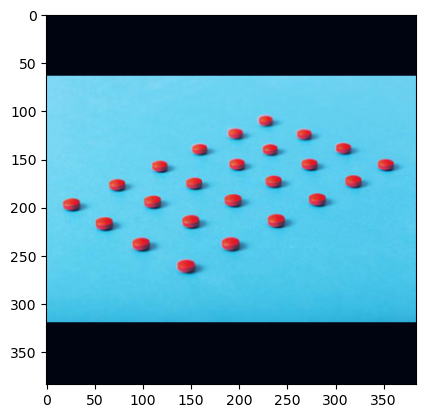

In [4]:
# Visualize the image
img = dataset[1230][0].permute(1, 2, 0)
img -= torch.min(img)
img /= torch.max(img)
plt.imshow(img)

In [15]:
from models.convtrans import VGG16Trans

model = VGG16Trans(8)
model.load_state_dict(torch.load('./checkpoint/0524_fsc-baseline/best_model.pth'))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = model.to(device)
model.eval()

/remote-home/xjzhao/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/remote-home/xjzhao/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG16Trans(
  (encoder): Sequential(
    (0): ConvBlock(
      (body): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
    (1): ConvBlock(
      (body): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): ConvBlock(
      (body): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
    (4): ConvBlock(
      (body): Sequential(
        (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padd

13.999999 7.303509521484375 32.91


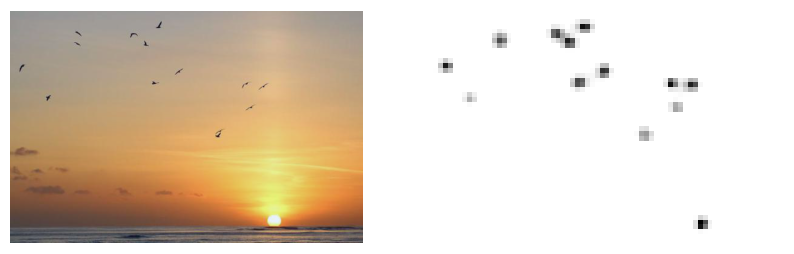

In [62]:
i = i
img, count, _, __ = dataset[i]

# make img grayscale
# img = torch.mean(img, dim=0, keepdim=True)
# img = img.repeat(3, 1, 1)

img -= torch.min(img)
img /= torch.max(img)
img = img.unsqueeze(0).to(device)
output = model(img)

output = output.squeeze(0).squeeze(0).cpu().detach().numpy()

output_count = np.sum(output)
binary_output = np.where(output > 1e-8, 0, 1)
print(count, output_count/100, np.sum(binary_output)/100)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the image
axes[0].imshow(img.squeeze(0).permute(1,2,0).cpu().detach().numpy())
axes[0].axis('off')
# axes[1].imshow(dmap.squeeze(0), cmap='binary')
# axes[1].axis('off')
axes[1].imshow(output, cmap='binary')
axes[1].axis('off')

# Show the plot
plt.show()

In [8]:
i = 0

In [9]:
dataset[i]

(tensor([[[0.2967, 0.2967, 0.2967,  ..., 0.0056, 0.0056, 0.0056],
          [0.2967, 0.2967, 0.2967,  ..., 0.0056, 0.0056, 0.0056],
          [0.2967, 0.2967, 0.2967,  ..., 0.0227, 0.0056, 0.0056],
          ...,
          [0.3138, 0.8961, 1.3755,  ..., 0.9132, 0.9132, 0.9132],
          [1.5810, 1.3584, 1.2385,  ..., 0.9132, 0.9132, 0.9132],
          [1.2728, 1.3413, 1.3584,  ..., 0.9132, 0.9132, 0.9132]],
 
         [[0.4328, 0.4328, 0.4328,  ..., 0.1176, 0.1176, 0.1176],
          [0.4328, 0.4328, 0.4328,  ..., 0.1176, 0.1176, 0.1176],
          [0.4328, 0.4328, 0.4328,  ..., 0.1352, 0.1176, 0.1176],
          ...,
          [0.3102, 0.9055, 1.3957,  ..., 1.0105, 1.0105, 1.0105],
          [1.6057, 1.3782, 1.2556,  ..., 1.0105, 1.0105, 1.0105],
          [1.2906, 1.3606, 1.3782,  ..., 1.0105, 1.0105, 1.0105]],
 
         [[0.6879, 0.6879, 0.6879,  ..., 0.4439, 0.4439, 0.4439],
          [0.6879, 0.6879, 0.6879,  ..., 0.4439, 0.4439, 0.4439],
          [0.6879, 0.6879, 0.6879,  ...,

torch.Size([3, 384, 384])


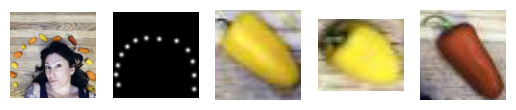

In [8]:
i=0
img, dmap, boxes = dataset[i]
img -= torch.min(img)
img /= torch.max(img)

print(img.shape)

fig, axes = plt.subplots(1, 5)

# Plot the image
axes[0].imshow(img.permute(1,2,0))
axes[0].axis('off')
axes[1].imshow(dmap.squeeze(0), cmap='gray')
axes[1].axis('off')

# Plot the bounding boxes
for j in range(len(boxes)):
    boxes[j] -= torch.min(boxes[j])
    boxes[j] /= torch.max(boxes[j])
    axes[j+2].imshow(boxes[j].permute(1,2,0))
    axes[j+2].axis('off')


# Show the plot
plt.show()

In [ ]:
# i = i+10
img, dmap, boxes = dataset[i]

# make img grayscale
# img = torch.mean(img, dim=0, keepdim=True)
# img = img.repeat(3, 1, 1)

img -= torch.min(img)
img /= torch.max(img)
img = img.unsqueeze(0).to(device)
output = model(img)

output = output.squeeze(0).squeeze(0).cpu().detach().numpy()

print(img.shape, dmap.shape, output.shape)

dmap_count = np.sum(dmap.squeeze(0).cpu().detach().numpy())
output_count = np.sum(output)
print(dmap_count, output_count/100)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the image
axes[0].imshow(img.squeeze(0).permute(1,2,0).cpu().detach().numpy())
axes[0].axis('off')
axes[1].imshow(dmap.squeeze(0), cmap='binary')
axes[1].axis('off')
axes[2].imshow(output, cmap='binary')
axes[2].axis('off')

# Show the plot
plt.show()

ValueError: too many values to unpack (expected 3)

In [3]:
from models.convtrans import ViTEncoder
encoder = ViTEncoder(image_size=384,
                    patch_size=16,
                    num_layers=12,
                    num_heads=12,
                    hidden_dim=768,
                    mlp_dim=3072)

In [4]:
encoder.state_dict().keys()

odict_keys(['conv_proj.weight', 'conv_proj.bias', 'encoder.pos_embedding', 'encoder.layers.encoder_layer_0.ln_1.weight', 'encoder.layers.encoder_layer_0.ln_1.bias', 'encoder.layers.encoder_layer_0.self_attention.in_proj_weight', 'encoder.layers.encoder_layer_0.self_attention.in_proj_bias', 'encoder.layers.encoder_layer_0.self_attention.out_proj.weight', 'encoder.layers.encoder_layer_0.self_attention.out_proj.bias', 'encoder.layers.encoder_layer_0.ln_2.weight', 'encoder.layers.encoder_layer_0.ln_2.bias', 'encoder.layers.encoder_layer_0.mlp.0.weight', 'encoder.layers.encoder_layer_0.mlp.0.bias', 'encoder.layers.encoder_layer_0.mlp.3.weight', 'encoder.layers.encoder_layer_0.mlp.3.bias', 'encoder.layers.encoder_layer_1.ln_1.weight', 'encoder.layers.encoder_layer_1.ln_1.bias', 'encoder.layers.encoder_layer_1.self_attention.in_proj_weight', 'encoder.layers.encoder_layer_1.self_attention.in_proj_bias', 'encoder.layers.encoder_layer_1.self_attention.out_proj.weight', 'encoder.layers.encoder_la

In [1]:
from models.convtrans import TransformerEncoderDecoder
from torchsummary import summary

model = TransformerEncoderDecoder(8)

summary(model, (3, 384, 384))

x torch.Size([2, 3, 384, 384])
i torch.Size([2, 576, 768])
m torch.Size([2, 576, 768])
o torch.Size([2, 768, 576])
torch.Size([576, 2, 768])
torch.Size([576, 2, 768])
torch.Size([576, 2, 768])
torch.Size([576, 2, 768])
Layer (type:depth-idx)                                  Output Shape              Param #
├─ViTEncoder: 1-1                                       [-1, 768, 24, 24]         --
|    └─Conv2d: 2-1                                      [-1, 768, 24, 24]         590,592
|    └─Encoder: 2-2                                     [-1, 576, 768]            --
|    |    └─Dropout: 3-1                                [-1, 576, 768]            --
|    |    └─Sequential: 3-2                             [-1, 576, 768]            85,054,464
|    |    └─LayerNorm: 3-3                              [-1, 576, 768]            1,536
├─Transformer: 1-2                                      [-1, 2, 768]              --
|    └─ModuleList: 2                                    []                      

Layer (type:depth-idx)                                  Output Shape              Param #
├─ViTEncoder: 1-1                                       [-1, 768, 24, 24]         --
|    └─Conv2d: 2-1                                      [-1, 768, 24, 24]         590,592
|    └─Encoder: 2-2                                     [-1, 576, 768]            --
|    |    └─Dropout: 3-1                                [-1, 576, 768]            --
|    |    └─Sequential: 3-2                             [-1, 576, 768]            85,054,464
|    |    └─LayerNorm: 3-3                              [-1, 576, 768]            1,536
├─Transformer: 1-2                                      [-1, 2, 768]              --
|    └─ModuleList: 2                                    []                        --
|    |    └─TransformerEncoderLayer: 3-4                [-1, 2, 768]              5,513,984
|    |    └─TransformerEncoderLayer: 3-5                [-1, 2, 768]              5,513,984
|    |    └─TransformerEncoder